# Imports

In [28]:
import glob
import PIL
from PIL import Image
import numpy as np
import tensorflow as tf

# Carregando as imagens

In [29]:
# Diretório "uvas" está na raiz do script Python
diretorio = './base_img/uvas'

# Contar arquivos JPG no diretório e subdiretórios
jpg_count = glob.glob(f"{diretorio}/**/*.JPG", recursive=True)

print(f"Você tem {len(jpg_count)} imagens JPG no diretório 'uvas' e subdiretórios.")

Você tem 1600 imagens JPG no diretório 'uvas' e subdiretórios.


In [30]:
leafblight = list(glob.glob(f"{diretorio}/LeafBlight/*.JPG", recursive=True))

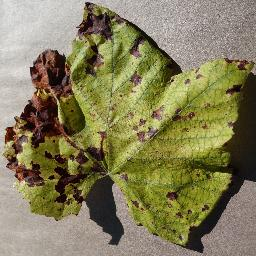

In [31]:
Image.open(str(leafblight[0]))

In [32]:
# Listar apenas diretórios dentro de "uvas" usando os.scandir
with os.scandir(diretorio) as entries:
    subdiretorios = [entry.name for entry in entries if entry.is_dir()]

# Convertendo as imagens para array numpy

In [33]:
for subdiretorio in subdiretorios:
    v = list(glob.glob(f"{diretorio}/{subdiretorio}/*.JPG", recursive=True))
    
    if v:
        img = PIL.Image.open(str(v[0]))
        img_array = np.array(img)
        print(f'Dimensões da primeira imagem em {subdiretorio}: {img_array.shape}')

Dimensões da primeira imagem em LeafBlight: (256, 256, 3)
Dimensões da primeira imagem em HealthyGrapes: (256, 256, 3)
Dimensões da primeira imagem em BlackRot: (256, 256, 3)
Dimensões da primeira imagem em BlackMeasles: (256, 256, 3)


# Construindo a Rede neural

In [34]:
batch_size = 64
altura = 256
largura = 256

## Carregando as imagens com o keras

In [35]:
train = tf.keras.utils.image_dataset_from_directory(
    diretorio,
    validation_split=0.2,
    subset='training',
    seed=568,
    image_size = (altura, largura),
    batch_size = batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [39]:
validation = tf.keras.utils.image_dataset_from_directory(
    diretorio,
    validation_split=0.2,
    subset='validation',
    seed=568,
    image_size = (altura, largura),
    batch_size = batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [40]:
train.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [41]:
tf.random.set_seed(424242)

In [42]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3), name='Entrada'),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='oculta'),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax, name='saida')
])

In [43]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ oculta (Dense)                  │ (None, 128)            │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ saida (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,166,468 (96.00 MB)

 Trainable params: 25,166,468 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
epocas = 10

history = modelo.fit(train, 
                    validation_data = validation,
                    epochs=epocas)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.2974 - loss: 83.5208 - val_accuracy: 0.4750 - val_loss: 12.1487
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.4893 - loss: 9.9001 - val_accuracy: 0.7125 - val_loss: 3.9595
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.5495 - loss: 5.0933 - val_accuracy: 0.5719 - val_loss: 3.5268
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.6488 - loss: 2.8756 - val_accuracy: 0.6719 - val_loss: 4.5697
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.6351 - loss: 3.3780 - val_accuracy: 0.6219 - val_loss: 1.9709
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.5884 - loss: 4.6094 - val_accuracy: 0.6844 - val_loss: 4.4970
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.6244 - loss: 3.6419 - val_accuracy: 0.7031 - val_loss: 1.8285
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.7063 - loss: 1.8305 - val_accuracy: 

In [18]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ oculta (Dense)                  │ (None, 128)            │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ saida (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,499,406 (288.01 MB)

 Trainable params: 25,166,468 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,332,938 (192.00 MB)

In [19]:
import matplotlib.pyplot as plt

def plot_results(history, epocas):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epocas)

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, 'r', label='Acurácia do Treino')
    plt.plot(epochs_range, val_acc, 'b', label = 'Acurácia da Validação')
    plt.legend(loc='lower right')

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, 'r', label='Perda do Treino')
    plt.plot(epochs_range, val_loss, 'b', label='Perda da Validação')
    plt.legend(loc='upper right')
    
    plt.show()

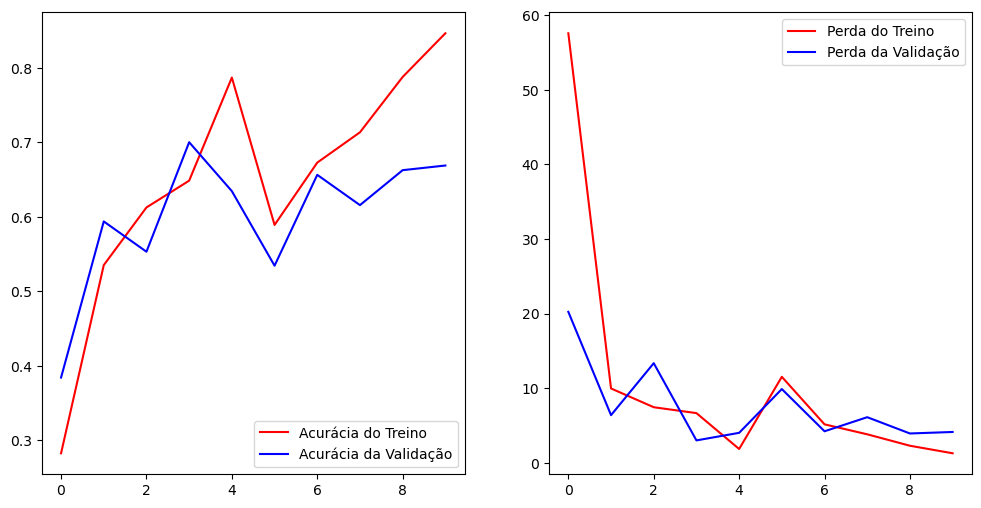

In [20]:
plot_results(history, epocas)

In [21]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3), name='Entrada'),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='filtro'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='filtro2'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='oculta'),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax, name='saida')
])

In [22]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ filtro (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ filtro2 (Conv2D)                │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ oculta (Dense)                  │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ saida (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,755,812 (60.10 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
epocas = 10

history = modelo.fit(train, 
                    validation_data = validation,
                    epochs=epocas)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 912ms/step - accuracy: 0.2767 - loss: 7.4095 - val_accuracy: 0.5875 - val_loss: 0.8443
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 903ms/step - accuracy: 0.7180 - loss: 0.6860 - val_accuracy: 0.8406 - val_loss: 0.4298
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 907ms/step - accuracy: 0.8805 - loss: 0.3330 - val_accuracy: 0.9094 - val_loss: 0.2831
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 896ms/step - accuracy: 0.9258 - loss: 0.2066 - val_accuracy: 0.9219 - val_loss: 0.2194
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 895ms/step - accuracy: 0.9631 - loss: 0.1306 - val_accuracy: 0.9250 - val_loss: 0.2390
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 897ms/step - accuracy: 0.9762 - loss: 0.0971 - val_accuracy: 0.9406 - val_loss: 0.1633
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 898ms/step - accuracy: 0.9970 - loss: 0.0338 - val_accuracy: 0.9375 - val_loss: 0.1775
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 901ms/step - accuracy: 0.9925 - loss: 0.0301 - val_accu

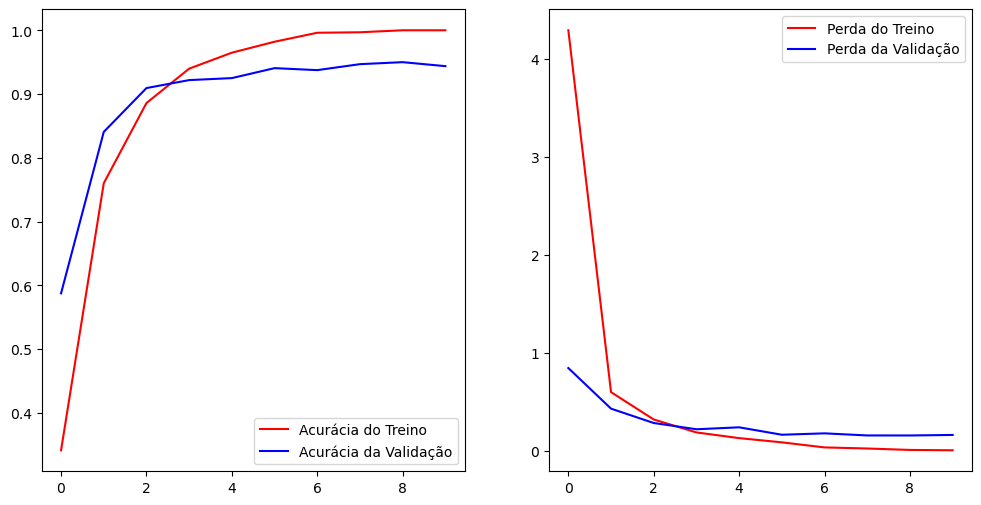

In [25]:
plot_results(history, epocas)

In [26]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ filtro (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ filtro2 (Conv2D)                │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ oculta (Dense)                  │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ saida (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

In [27]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, log={}):
        if (logs.get('accuracy')>=0.93):
            print(f'\n Alcaçamos 93% de acurácia.')
            self.model.stop_training = True

callbacks = MyCallback()

In [28]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3), name='Entrada'),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='filtro'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='filtro2'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='oculta'),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax, name='saida')
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)